Equation Minimization using Genetic Algorithms

In [1]:
import math
import numpy as np
import random as r
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

Customizable Parameters

In [2]:
# constants
MIN = -1000
MAX = 1000
CHROMOSOME_LENGTH=5
POPULATION_SIZE=10
MUTATE_PROBABILITY=0.1
CROSSOVER_PROBABILITY=0.7
CROSSOVER_COUNT=5
GENERATION=10000
limit = 10
cofactors = np.array([1 for i in range(0,CHROMOSOME_LENGTH)])

In [3]:
def choose_chromosome(pop):
    index = r.randint(0, len(pop)-1)
    first = pop[index]
    np.delete(pop,[index])
    return first

def calculate_fitness(chromosome, co):
    return np.sum((chromosome ** 2) * co)

def generate_population(length, size):
    pop = []
    for i in range(0,size):
        each = np.random.randint(MIN,MAX,length)
        pop.append(each)
    return np.array(pop)

def mutate(pop):
   count = 0
   for chromosome in pop:
       chance = r.random()
       if chance < MUTATE_PROBABILITY:
           which = r.randint(0,len(chromosome)-1)
           gene = r.randint(MIN,MAX)
           chromosome[which] = gene
           count += 1
   return count

def crossover(fits, pop):
    offspring = []
    count = 0

    for i in range(0,CROSSOVER_COUNT):
        chance = r.random()
        if chance < CROSSOVER_PROBABILITY:
            count += 1
            swap_index = r.randint(0, len(pop[0])-1)
            first = pop[choose_chromosome(fits)[1]]
            second = pop[choose_chromosome(fits)[1]]
            off1 = np.append(first[0:swap_index], second[swap_index:])
            off2 = np.append(second[0:swap_index], first[swap_index:])
            offspring.append(off1)
            offspring.append(off2)
    return np.array(offspring), count

def select(pop, cof):
    fitness = []
    for i in range(0, len(pop)):
       n = calculate_fitness(pop[i], cof)
       fitness.append([n, i])
    fitness.sort(key=lambda row: (row[0]), reverse=False)
    return np.array(fitness[0:POPULATION_SIZE//2]), np.average(np.array(fitness)[:, 0])




generation:6402 avg_fitness:9.23076923076923 mutations:7626 crossovers:22348
fitness:[[9 0]
 [9 1]
 [9 2]
 [9 3]
 [9 5]]
chromosomes:[[ 0  0  0 -3  0]
 [ 0  0  0 -3  0]
 [ 0  0  0 -3  0]
 [ 0  0  0 -3  0]
 [ 0  0  0 -3  0]]


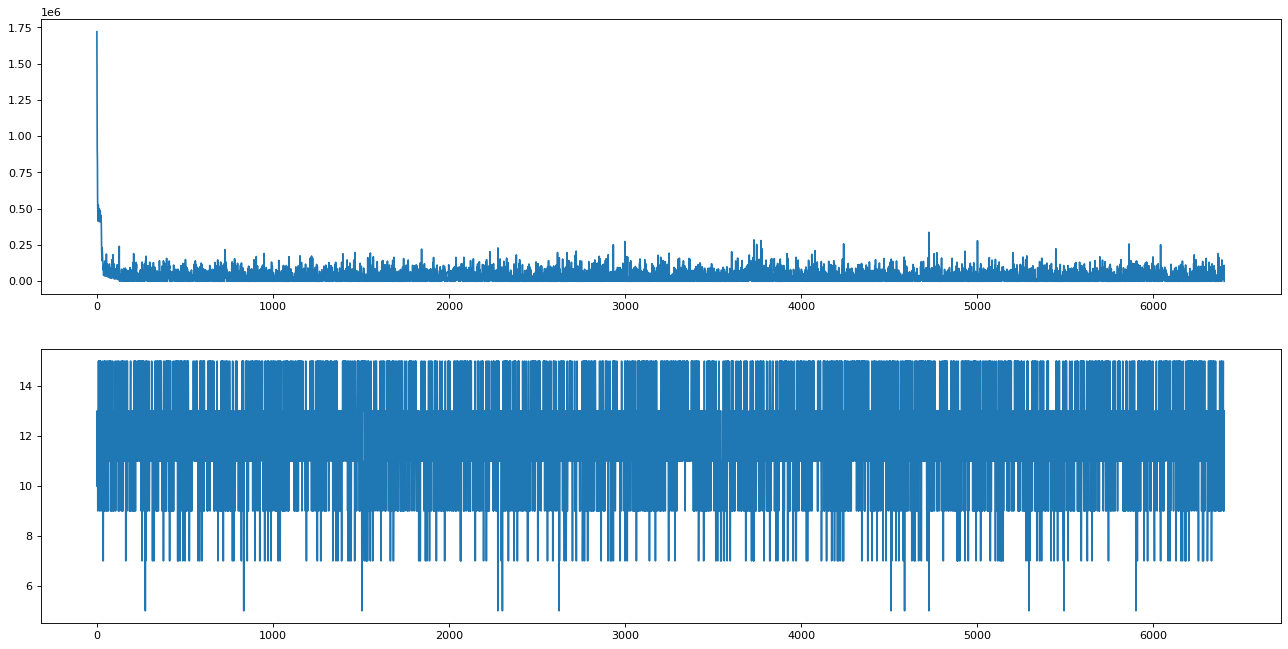

In [4]:
fig = plt.figure(figsize=(20,10), dpi=80)
ax1 = fig.add_subplot(2,1,1)
xs1 = []
ys1 = []

ax2 = fig.add_subplot(2,1,2)
xs2 = []
ys2 = []


mutation_count = 0
crossover_count = 0
population = generate_population(CHROMOSOME_LENGTH,POPULATION_SIZE)
for g in range(0,GENERATION):
    # graph =========================
    xs2.append(g)
    ys2.append(len(population))
    # calculation ====================
    best,avg_fitness = select(population,cofactors)
    indices = best[:,1]
    offspring, cross_count = crossover(best, population)
    population = np.append(population[indices],offspring, axis=0) if offspring.ndim > 1 else population[indices]
    crossover_count += cross_count
    mutation_count += mutate(population)
    # graph ===================
    xs1.append(g)
    ys1.append(avg_fitness)
    # end condition ===============
    if avg_fitness < limit:
        print(f'generation:{g} avg_fitness:{avg_fitness} mutations:{mutation_count} crossovers:{crossover_count}\nfitness:{best}\nchromosomes:{population[indices]}')
        break

ax1.clear()
ax1.plot(xs1, ys1)

ax2.clear()
ax2.plot(xs2,ys2)